In [43]:
import cv2
import csv
import numpy as np

class ImgGenerator():
    def __init__(self,img_path,batch_id,batch_size):
        self.img_path = img_path
        self.batch_id = batch_id
        self.batch_size = batch_size
        self.current_frame = 0
        
    def next_batch(self):
        #标注处理
        labels_list = []
        with open(self.img_path + self.batch_id + '_steering.csv', encoding='utf-8') as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for i,row in enumerate(csv_reader):
                if(i in range(self.current_frame,self.current_frame+self.batch_size)):
                    labels_list.append([float(row['wheel'])])
                    
        #图像处理        
        cap = cv2.VideoCapture(self.img_path + self.batch_id + '_front.mkv')
        nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        frames = [x for x in range(self.current_frame,self.current_frame+self.batch_size)]
        frame_list = []
        for i in range(self.batch_size):
            cap.set(cv2.CAP_PROP_POS_FRAMES ,frames[i])
            ret, frame = cap.read()
            if (ret == True):
                frame = cv2.resize(frame,(480,270))
                frame_list.append(frame)
                #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                #cv2.imshow('frame',gray)
                del frame
                
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

        self.current_frame += self.batch_size
        return (np.array(frame_list),np.array(labels_list))

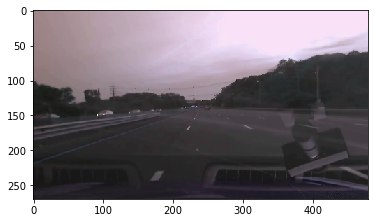

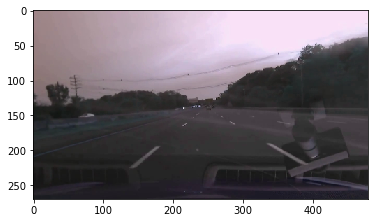

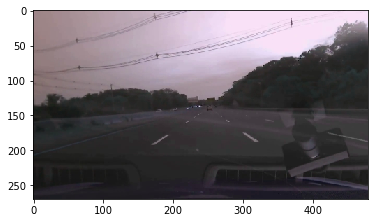

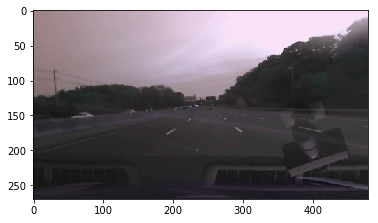

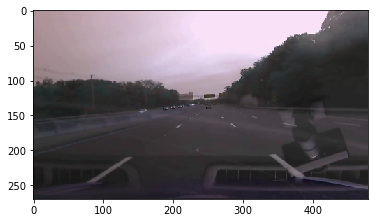

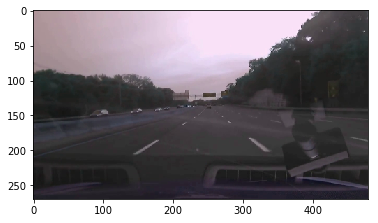

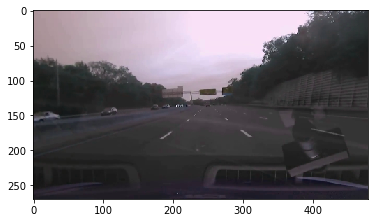

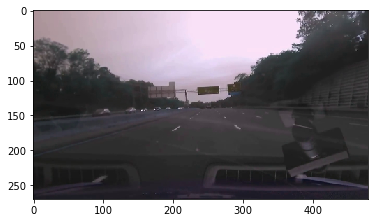

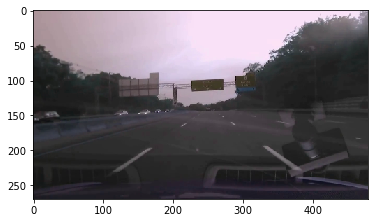

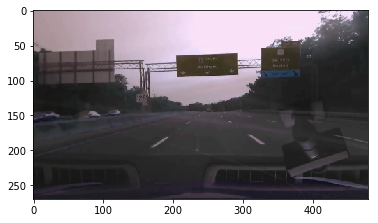

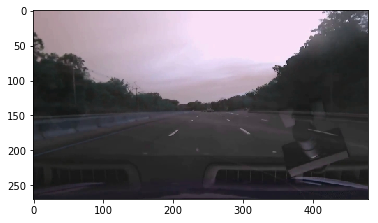

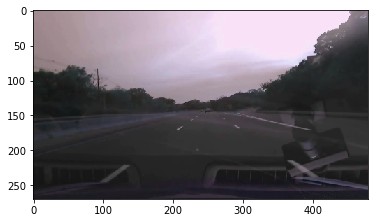

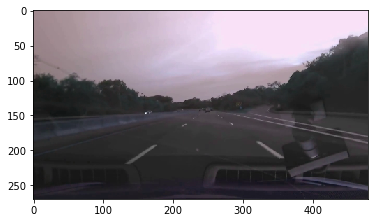

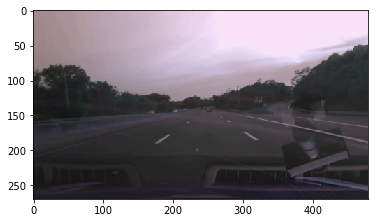

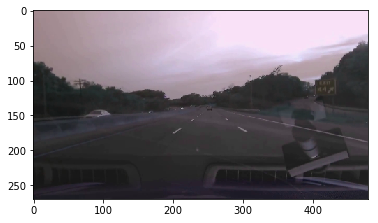

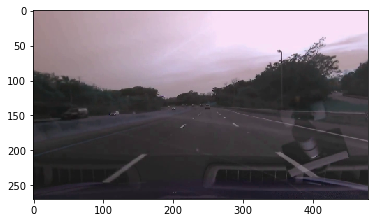

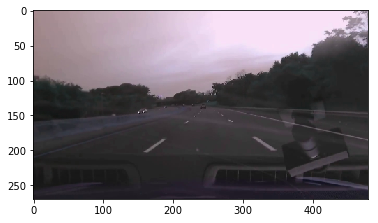

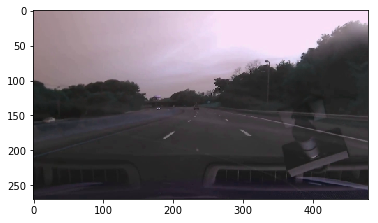

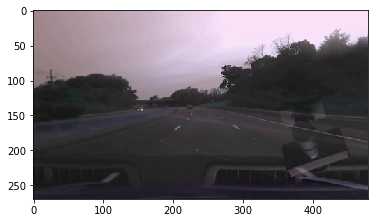

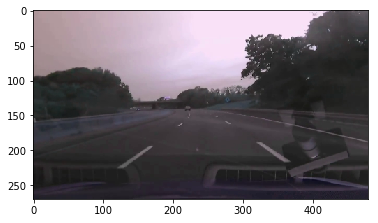

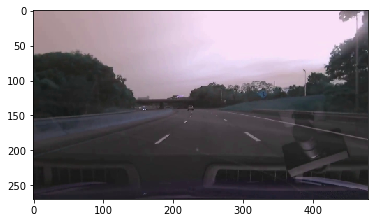

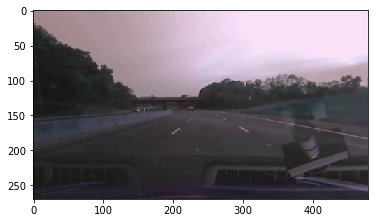

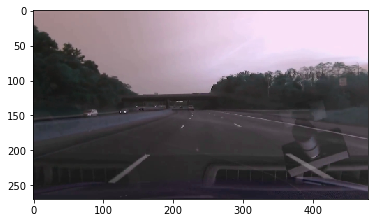

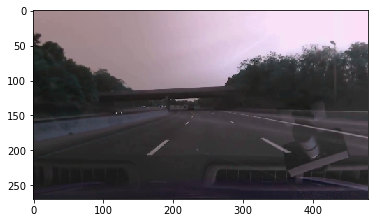

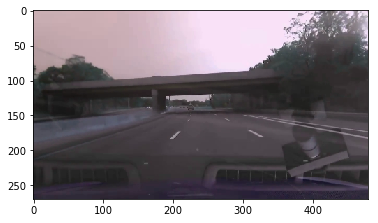

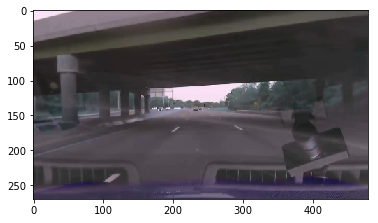

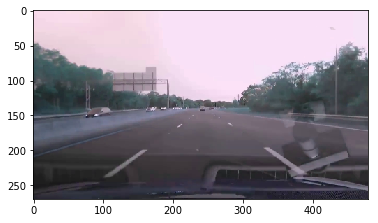

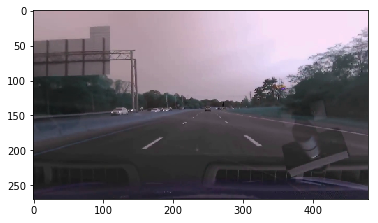

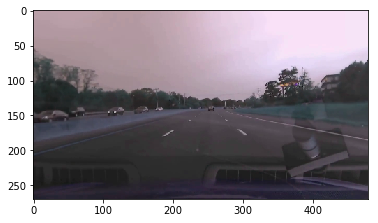

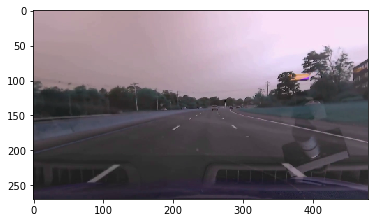

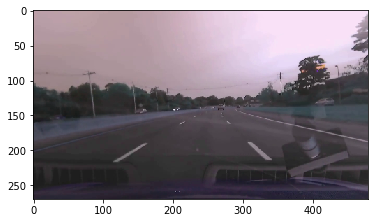

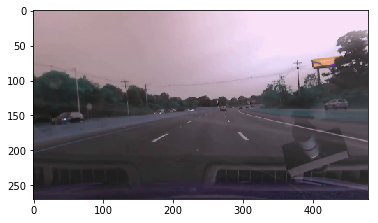

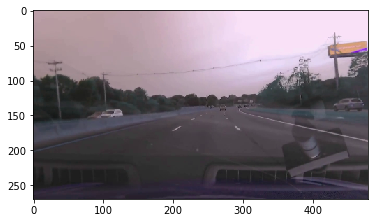

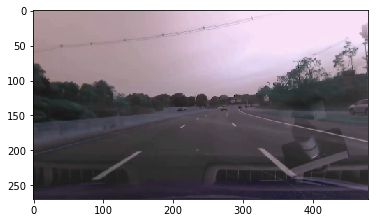

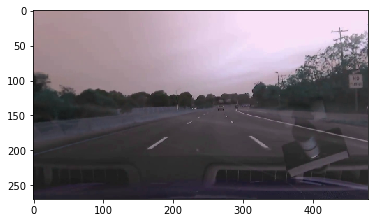

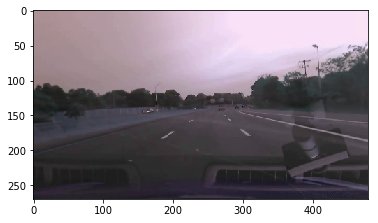

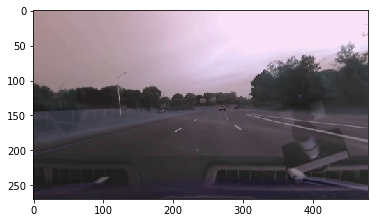

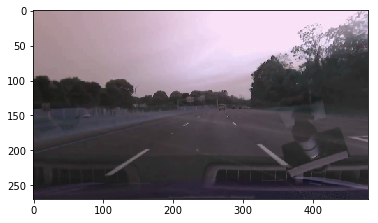

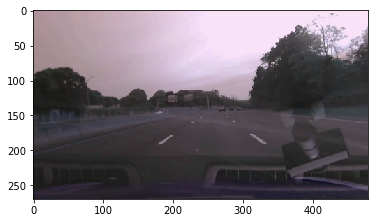

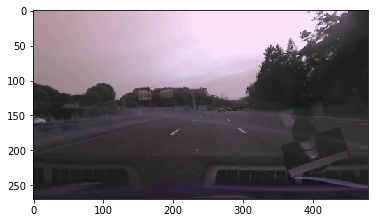

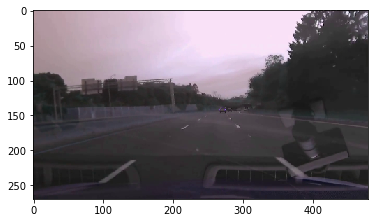

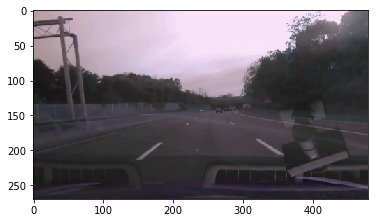

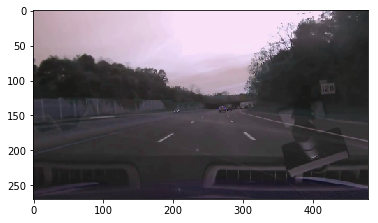

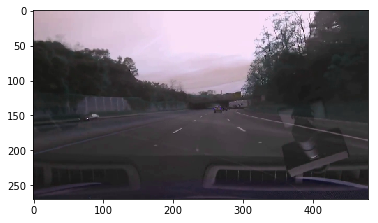

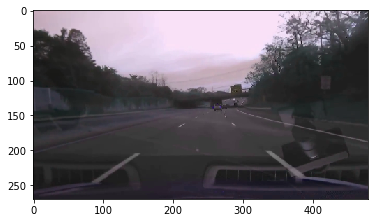

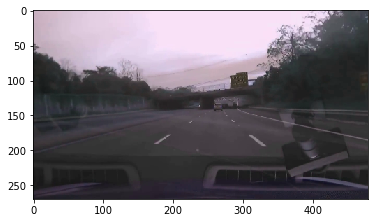

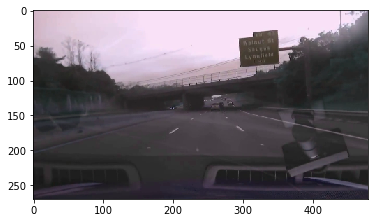

x shape: (0,)
y shape: (0,)


NameError: name 'y' is not defined

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.datasets import cifar10
import keras
from matplotlib import pyplot as plot
%matplotlib inline

img_path = '../epochs/epoch'
batch_size = 32
for epochid in ['01']:
    imggen = ImgGenerator(img_path=img_path,
                     batch_id=epochid,
                     batch_size=batch_size)
    while True:
        x_train,y_train = imggen.next_batch()
        if(len(x_train) == 0):
            break
        plot.imshow(x_train[0])
        plot.show()

print('x shape:', x_train.shape)
print('y shape:', x_train.shape)
num_classes =10
y_train = keras.utils.to_categorical(x_train, num_classes)
print(y[0])
input_tensor = Input(shape=(270, 480, 3))
model = ResNet50(include_top=False, weights=None,input_tensor=input_tensor)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train,
          epochs=10,
          batch_size=10,
          validation_data=(x_train, y_train),
          shuffle=True)
#score = model.evaluate(x_test, y_test, batch_size=10)
print('Score:', score)